In [2]:
import pyautogui
from screeninfo import get_monitors

In [3]:
# This section gets the main monitor's features (x and y start position, width and height).

monitor = get_monitors()[0]
main_screen = (monitor.x, monitor.y, monitor.width, monitor.height)
print(main_screen)

(0, 0, 3840, 2160)


In [3]:
# Show a screenshot, proving the retrieved features are corrects.

monitor_screen = pyautogui.screenshot(region=main_screen)
monitor_screen.show()


(eog:4102): Gtk-WARNING **: 23:35:46.873: Could not load a pixbuf from icon theme.
This may indicate that pixbuf loaders or the mime database could not be found.


In [4]:
# Find the stats boxes cordinates.

localisation4Boxes = pyautogui.locateOnScreen('./images/Positions.png', region=main_screen)
print(localisation4Boxes)

None


In [5]:
# Find the tab coordinates (Sword and Shield).

localisationTabs = pyautogui.locateOnScreen('./images/Tabs.png', region=main_screen)
print(localisationTabs)

None


In [4]:
stat_box_width = 532 # 1065 / 2
stat_box_height = 215 # 430 / 2

X_stat_box = main_screen[0] + 1385
Y_stat_box = 1380

stride = 10

# loc variables contain starting X and Y, then Width and Height of the box.
locTL = (X_stat_box + stat_box_width / 2, Y_stat_box, stat_box_width / 2, stat_box_height)
# center variables contains the center of the boxes, to click later when needed.
centerTL = (X_stat_box + stat_box_width / 2, Y_stat_box + stat_box_height / 2)

locTR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box, stat_box_width / 2, stat_box_height)
centerTR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box + stat_box_height / 2) 

locBR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box + stat_box_height, stat_box_width / 2, stat_box_height)
centerBR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box + stat_box_height + stat_box_height / 2)

# Need to find the Sword, Shield, Star position and centers. Same proccess than before.
X_tab_box = main_screen[0] + 1357
Y_tab_box = 1973

tab_box_width = 279.5 #559 / 2
tab_box_height = 106

locSword = (X_tab_box, Y_tab_box, tab_box_width, tab_box_height)
centerSword = (X_tab_box + tab_box_width / 2, Y_tab_box + tab_box_height / 2)

locShield = (X_tab_box + tab_box_width + stride / 4, Y_tab_box, tab_box_width, tab_box_height)
centerShield = (X_tab_box + tab_box_width + stride / 4 + tab_box_width / 2, Y_tab_box + tab_box_height / 2)

In [5]:
from time import sleep
sleep(3)

Degats = pyautogui.screenshot(region=locTL)
Degats.show()

In [6]:
def click(item):
    pyautogui.click(x=item[0], y=item[1], clicks=1, button='left')

In [9]:
click(centerSword)

In [10]:
screen_to_ocr = pyautogui.screenshot(region=locTL, imageFilename="./images/image_to_ocr.png")
screen_to_ocr.show()

In [7]:
from PIL import Image

import pytesseract

In [8]:
# In the case of "Dégats" we have to make this little processing.
sleep(5)
screen_to_ocr = pyautogui.screenshot(region=locTL)

Degats_OCR = pytesseract.image_to_string(screen_to_ocr)

Degats_OCR = Degats_OCR.split("\n")[:2]


Degats_OCR = [i.replace(',', '.') for i in Degats_OCR]
Degats_OCR = [i.replace('$ ', '') for i in Degats_OCR]

print(Degats_OCR)


['20.73K', '16.39K']


In [33]:
def letter_to_number(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 1000

    if 'M' in x:       
        return float(x.replace('M', '')) * 1000000

In [50]:
Degats_OCR = list(map(letter_to_number, Degats_OCR))
print(Degats_OCR)

[20730.0, 16390.0]


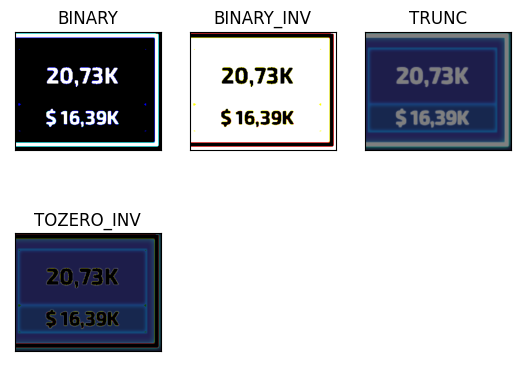

In [28]:
# In the case of "PV" we have to make this little processing.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

titles = ['BINARY','BINARY_INV','TRUNC','TOZERO_INV']

screen_to_ocr = pyautogui.screenshot(region=locTL)
screen_to_ocr = np.array(screen_to_ocr)

images = []

threshs = [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO_INV]

for t in threshs:
    res, thresh = cv.threshold(screen_to_ocr,127,255, t)
    images.append(thresh)

for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# screen_to_ocr.show()
# Pv_OCR = pytesseract.image_to_string(screen_to_ocr)
# print(Pv_OCR)

# Split accordingly.

#..._OCR = ..._OCR.split("\n")[:2]

#..._OCR = [i.replace(',', '.') for i in ..._OCR]
#..._OCR = [i.replace('$ ', '') for i in ..._OCR]

#print(..._OCR)

In [29]:
for i in images:
   
    print(pytesseract.image_to_string(i))


    

20,73K
EB [Reh] 4

 

20,73K
$ 16,39K

 

20,73K
eT) 4

 




In [36]:
# In the case of "PV" we have to make this little processing.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

screen_to_ocr = pyautogui.screenshot(region=locTR)
screen_to_ocr = np.array(screen_to_ocr)

res, thresh_image = cv.threshold(screen_to_ocr,127,255, cv.THRESH_BINARY_INV)
OCRed = pytesseract.image_to_string(thresh_image)

print(OCRed)


10,51



In [ ]:
# We can now make logical comparisons and act accordingly.